<h1>Overview</h1>

Chest X-Rays have had a massive role in detecting Covid-19 in an individual. Considering how the disease has affected us, we will create a Deep-Learning model as the first level of self-diagnosis. It will classify the Chest XRay image into COVID, Pneumonia, or a healthy lung (i.e., no diseases found).

This implementation classifies the Chest XRay image as Pneumonia or a healthy lung. Use this as a reference, and create a multiclass classification model, classifying the images into Covid-19, Pneumonia, or normal healthy lung.

We will build this model in Python, using TensorFlow Keras.

<h1>Problem Statement</h1>

This implementation is ridiculed with errors. The model accuracy is low, and the predictions are incorrect. Moreover, the dataset needs to be updated for three-class classification and trained accordingly. It is recommended that you change the model.

<h1>Datasets</h1>

This notebook is implemented on Pneumonia and normal images. We've taken the dataset from https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia, and hosted it on [dropbox](https://www.dropbox.com/s/oq0apzpkgql5rgo/Chest_X_ray%28Pneumonia%29.zip?dl=1) for easy access.<br>Ref: Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), "Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification", Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2

For the submission, we are combining the datasets from multiple locations. You can find the individual datasets here:

1. Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), "Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification", Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2
2. [COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset](https://www.kaggle.com/amanullahasraf/covid19-pneumonia-normal-chest-xray-pa-dataset)
3. * M.E.H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M.A. Kadir, Z.B. Mahbub, K.R. Islam, M.S. Khan, A. Iqbal, N. Al-Emadi, M.B.I. Reaz, M. T. Islam, "Can AI help in screening Viral and COVID-19 pneumonia?" IEEE Access, Vol. 8, 2020, pp. 132665 - 132676. [Paper link](https://ieeexplore.ieee.org/document/9144185)
   * Rahman, T., Khandakar, A., Qiblawey, Y., Tahir, A., Kiranyaz, S., Kashem, S.B.A., Islam, M.T., Maadeed, S.A., Zughaier, S.M., Khan, M.S. and Chowdhury, M.E., 2020. Exploring the Effect of Image Enhancement Techniques on COVID-19 Detection using Chest X-ray Images. [Paper Link](https://doi.org/10.1016/j.compbiomed.2021.104319)

We have combined and prepared the dataset already. You can download it from the following dropbox link: https://www.dropbox.com/s/73s9n7nugqrv1h7/Dataset.zip?dl=1

Dataset contains 3 folders, namely:
* <b>Covid</b>: This folder contains lung x-ray images with covid-19 disease
* <b>Pneumonia</b>: This folder contains lung x-ray images with pneumonia disease
* <b>Normal</b>: This folder contains normal functioning and healthy lung x-ray images

<h1>Tasks</h1>

<b>1. Train a pre-trained convolution neural network</b>

Steps to approach this task:

1. Save a copy of this notebook to your drive. Make sure to select "GPU" as the Hardware accelerator in the runtime option by going to <b>Runtime → Change runtime type → Hardware accelerator → GPU</b>.
2. Update the `wget` command to download the new data. Then, `unzip` the dataset. Set the dataset_path accordingly. Set a fixed <b>seed</b> to make splits reproducible.
3. Use [ImageDataGenerator’s](https://keras.io/api/preprocessing/image/) `flow_from_directory()` method for augmentation and loading of the train and validation splits. Data augmentation is optional, but if you use it, make sure you have the proper logic/explanation behind the augmentation that you apply.
4. Normalise the input using the `rescale` parameter of `ImageDataGenerator`. Data normalisation is an important step that ensures that each input pixel has a similar data distribution.
5. Use transfer learning to train the model. Select and initialise a model from [this list](https://www.tensorflow.org/api_docs/python/tf/keras/applications). Keep the imagenet weights.
6. Add (at least) one custom `Dense` layer with `softmax` activation. After building your model, you will compile it and use accuracy as a metric.
7. Add your desired callbacks which will help you during the training.
8. Now, you can start with the training.
9. This is a medical imaging project; hence 95% accuracy is expected. That is the benchmark for the project.
10. Plot the loss and accuracy graphs using matplotlib or seaborn.
11. Test your model on the test set provided. Generate the classification report and the confusion matrix for the same.

<b>2. Test the model on an external test dataset</b>

After you are satisfied with your model, head on to [this link](https://share.streamlit.io/opencv-ai-courses/radiologyai-app/main/app.py). Upload your best model here, and get the evaluation results. The size limit to upload the model is 700MB.

![model-evaluation](http://courses.opencv.org/asset-v1:OpenCV+OpenCV-105+2019_T1+type@asset+block@model-evaluation.png)

<b>3. Video Explanation</b>

Make a short video explaining the changes you made in the notebook. You can create an interview type of video, screen recording, or send a document for the explanation.
 
<h1>Submission</h1>

In the form, you need to fill the following fields:
1. Colab notebook link
2. Screenshot of the external test set evaluation
3. Video/Text explanation

<h1>Grading Rubric</h1>

1. Train the image classifier <b>70 Marks</b>
2. Test the model on an external test dataset <b>10 Marks</b>
3. Code Explanation <b>20 Marks</b>

In [1]:
# Checking the GPU information

!nvidia-smi

Thu Feb  9 15:11:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    24W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Importing required libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.keras.backend.clear_session()
from tensorflow.keras.layers import Input, Softmax, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Mounting Google drive to save models, and etc.

# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Downloading the Chest X-ray dataset

!wget https://www.dropbox.com/s/73s9n7nugqrv1h7/Dataset.zip?dl=1 -O 'archive.zip'

--2023-02-09 15:11:57--  https://www.dropbox.com/s/73s9n7nugqrv1h7/Dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/73s9n7nugqrv1h7/Dataset.zip [following]
--2023-02-09 15:11:58--  https://www.dropbox.com/s/dl/73s9n7nugqrv1h7/Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5705bac868224858dae98db893.dl.dropboxusercontent.com/cd/0/get/B2JwJo42Mnj78NCGD7yP0NyccteEE0iAEB60lV4-QCVdMpScHqZlPGha9GPXEk5GuvXr70r8I6BoVj_N2xYHO453yXJxPjBSZLrCnpQpHHA3tVVUZDjW13FWYojGFFu8KOZ2IQXQwHQd0JFOZHCh-6iaT7v35_pPWRlWCiEmjGfz_ppQLTS1RzyOobk7APIk-JU/file?dl=1# [following]
--2023-02-09 15:11:58--  https://uc5705bac868224858dae98db893.dl.dropboxusercontent.com/cd/0/get/B2JwJo42Mnj78NCGD7yP0NyccteEE0iAEB60lV4-QCVdMpScHqZlPGha9GP

In [4]:
# Unzipping the dataset and delete the .zip file

!unzip -q '/content/archive.zip'
!rm -rf '/content/archive.zip'

In [5]:
# Settting up batch size, random seed, and the dataset path

BATCH_SIZE = 64
SEED = 21
dataset_path = '/content/Dataset'

In [6]:
# Initialising ImageDataGenerator for data augmentation
# We use random horizontal flip for augmentation
# Pixels will be notmalised between 0 and 1
  # zca_epsilon: Epsilon for ZCA whitening. Default is 1e-6
  # Horizontal_flip: Boolean. Randomly flip inputs horizontally.
  # Rescale: Rescaling factor, defaults to None.
           # If None or 0, no rescaling is applied, otherwise it multiplied the data by the value provided
           # (after applying all other transformations)

datagen = ImageDataGenerator(rescale = 1./255)        # Do not change rescale

# The evaluation on streamlit share assumes rescaling takes place,
# and it is 1./255 always

In [7]:
# Taking input of the train, validation, and test images using flow_from_directory() function
# Setting the image size to (224, 224) and setting the batch size

train_datagen = datagen.flow_from_directory(directory = dataset_path + '/train',
                                                  target_size = (224, 224),
                                                  color_mode = "rgb",
                                                  classes = None,
                                                  class_mode = "categorical",
                                                  batch_size = BATCH_SIZE,
                                                  shuffle = True,
                                                  seed = SEED,
                                                  interpolation = "nearest")

val_datagen = datagen.flow_from_directory(directory = dataset_path + '/val',
                                                target_size = (224, 224),
                                                color_mode = "rgb",
                                                classes = None,
                                                class_mode = "categorical",
                                                batch_size = BATCH_SIZE,
                                                shuffle = True,
                                                seed = SEED,
                                                interpolation = "nearest")


# For testing, we should take one input at a time. Hence, batch_size = 1

test_datagen = datagen.flow_from_directory(directory = dataset_path + '/test',
                                            target_size = (224, 224),
                                            color_mode = "rgb",
                                            classes = None,
                                            class_mode = "categorical",
                                            batch_size = 1,
                                            shuffle = False,
                                            seed = SEED,
                                            interpolation = "nearest")

Found 11290 images belonging to 3 classes.
Found 3215 images belonging to 3 classes.
Found 1563 images belonging to 3 classes.


In [8]:
# Initialising MobileNet model and passing the imagenet weights
# We are specifying classes = 1000 because the model was trained on 1000 classes
# The classes will be changed afterwards according to our problem

pretrained_model = tf.keras.applications.MobileNet(weights = 'imagenet',
                                                   classes = 1000,
                                                   input_shape = (224, 224, 3),
                                                   include_top = False,
                                                   pooling = 'max')

17225924/17225924 [==============================] - 2s 0us/step


In [9]:
# Printing the model summary

print(pretrained_model.summary())

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [10]:
# Adding a prediction layer. It takes input from the last layer (global_max_pooling2d) of MobileNet
# It has 2 dense units, as it is a binary classification problem

predictions = Dense(3, activation = 'softmax')(pretrained_model.output)


# Defining new model's input and output layers
# Input layer of the new model will be the same as MobileNet
# But the output of the new model will be the output of final dense layer, i.e., 3 units

model = Model(inputs = pretrained_model.input, outputs = predictions)


# We use the SGD optimiser, with a very low learning rate, and loss function which is specific to two class classification

model.compile(optimizer = tf.keras.optimizers.Adam(0.00001),
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [11]:
# You can directly save the model into your Google drive by changing the below path

model_filepath = '/content/best_model.h5'


# ModelCheckpoint callback will save models weight if the training accuracy of the model has increased from the previous epoch

model_save = tf.keras.callbacks.ModelCheckpoint(model_filepath,
                                                monitor = "val_accuracy",
                                                verbose = 0,
                                                save_best_only = True,
                                                save_weights_only = False,
                                                mode = "max",
                                                save_freq = "epoch")


# Additionally you can add more callbacks, like ReduceLROnPlateau
model_redce_on_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',min_lr=0.0000001,factor=0.2,patience=2)
callback = [model_save,model_redce_on_lr]

In [12]:
# Printing the model summary

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [13]:
# Training the model for 5 epochs
# Shuffle is set to false because the data is already shuffled in flow_from_directory() method

history = model.fit(train_datagen,
                    epochs = 10,
                    steps_per_epoch = (len(train_datagen)),
                    validation_data = val_datagen,
                    validation_steps = (len(val_datagen)),
                    shuffle = False,
                    callbacks = callback)

Epoch 1/10
177/177 [==============================] - 135s 701ms/step - loss: 1.4329 - accuracy: 0.6762 - val_loss: 1.3308 - val_accuracy: 0.6501 - lr: 1.0000e-05
Epoch 2/10
177/177 [==============================] - 124s 699ms/step - loss: 0.4022 - accuracy: 0.8671 - val_loss: 0.7311 - val_accuracy: 0.7879 - lr: 1.0000e-05
Epoch 3/10
177/177 [==============================] - 122s 689ms/step - loss: 0.2352 - accuracy: 0.9182 - val_loss: 0.5443 - val_accuracy: 0.8476 - lr: 1.0000e-05
Epoch 4/10
177/177 [==============================] - 126s 712ms/step - loss: 0.1390 - accuracy: 0.9506 - val_loss: 0.4114 - val_accuracy: 0.8921 - lr: 1.0000e-05
Epoch 5/10
177/177 [==============================] - 126s 712ms/step - loss: 0.0984 - accuracy: 0.9660 - val_loss: 0.3769 - val_accuracy: 0.9051 - lr: 1.0000e-05
Epoch 6/10
177/177 [==============================] - 124s 699ms/step - loss: 0.0692 - accuracy: 0.9763 - val_loss: 0.3437 - val_accuracy: 0.9148 - lr: 1.0000e-05
Epoch 7/10
177/177 [==

In [ ]:
model.save("/content/best_model.h5",overwrite=True,include_optimizer=True,save_format='h5')

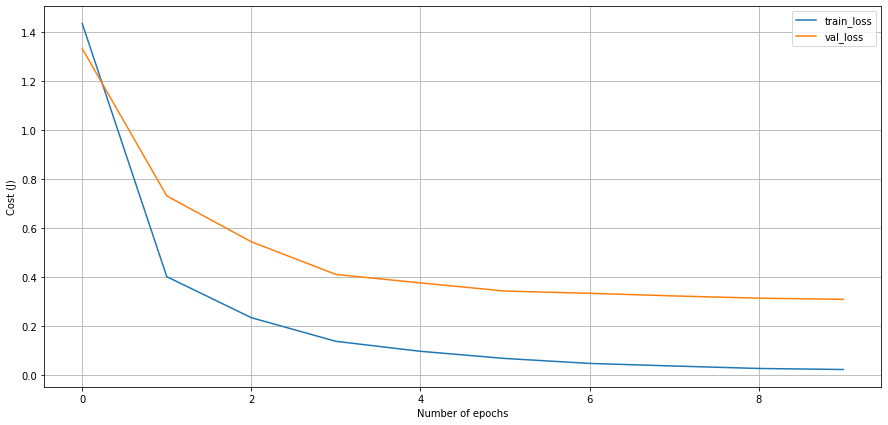

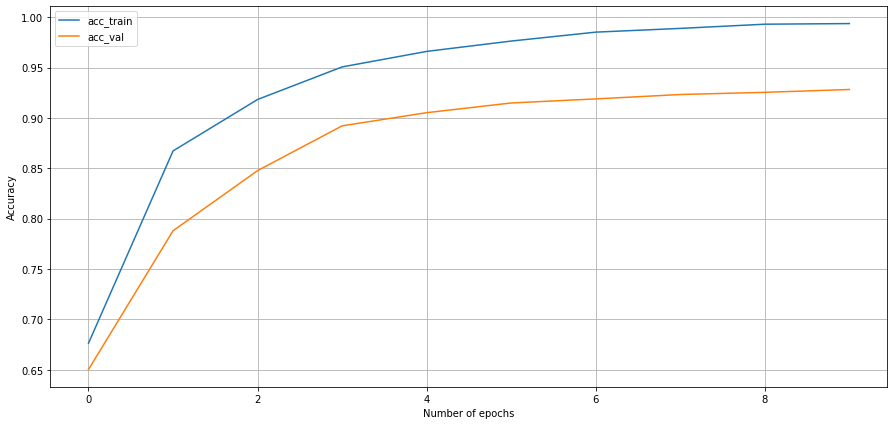

In [14]:
# Plotting the loss and accuracy graphs

import matplotlib.pyplot as plt

plt.figure(figsize = (15,7))

tr_losses = history.history['loss']
val_losses = history.history['val_loss']

tr_accs = history.history['accuracy']
val_accs = history.history['val_accuracy']

plt.plot(tr_losses, label = "train_loss")
plt.plot(val_losses, label = "val_loss")
plt.xlabel("Number of epochs")
plt.ylabel("Cost (J)")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize = (15,7))

plt.plot(tr_accs, label = "acc_train")
plt.plot(val_accs, label = "acc_val")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

## Model evaluation on test set



In [15]:
# Model prediction on test set

predictions = model.predict(test_datagen,
                            verbose = 1,
                            steps = (len(test_datagen)))

1563/1563 [==============================] - 24s 15ms/step


In [16]:
# Printing predicted classes on the test dataset

predictions.squeeze().argmax(axis = -1)

array([0, 2, 0, ..., 2, 2, 2])

In [17]:
# Generating the classification report for checking the model's performance on the test set of the same dataset

classification__report = classification_report(test_datagen.classes,
                                               predictions.squeeze().argmax(axis = 1))
print(classification__report)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       491
           1       0.89      0.90      0.90       545
           2       0.97      0.94      0.95       527

    accuracy                           0.92      1563
   macro avg       0.92      0.92      0.92      1563
weighted avg       0.92      0.92      0.92      1563



In [18]:
# Generating confusion matrix to see where the model is misclassifying

confusion__matrix = confusion_matrix(test_datagen.classes,
                                     predictions.squeeze().argmax(axis = 1))
print(confusion__matrix)

[[454  35   2]
 [ 38 493  14]
 [  9  24 494]]


In [19]:
# Defining a function to print a confusion matrix
# Code snippet referenced from: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html

import itertools
def plot_confusion_matrix(cm,
                          classes,
                          normalise = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Reds):
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalise:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        cm = cm.round(2)

    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

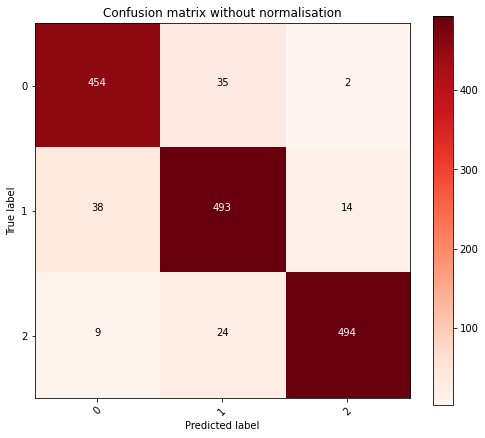

In [20]:
# Printing the confusion matrix (not normalised)

np.set_printoptions(precision = 2)
fig1 = plt.figure(figsize = (7, 6))
plot_confusion_matrix(confusion__matrix,
                      classes = np.unique(test_datagen.classes),
                      title = 'Confusion matrix without normalisation')
fig1.savefig('/content/cm_wo_norm.jpg')
plt.show()

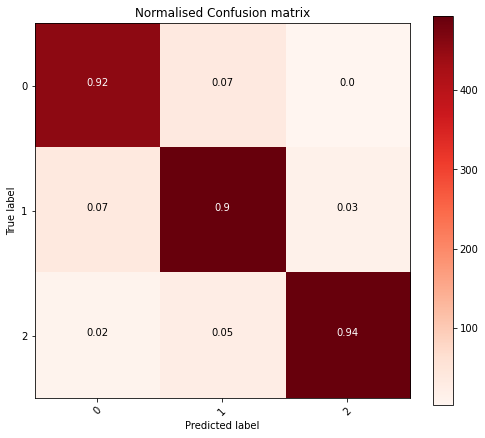

In [21]:
# Printing the confusion matrix (normalised)

np.set_printoptions(precision = 2)
fig2 = plt.figure(figsize = (7,6))
plot_confusion_matrix(confusion__matrix,
                      classes = np.unique(test_datagen.classes),
                      normalise = True,
                      title = 'Normalised Confusion matrix')
fig2.savefig('/content/cm_norm.jpg')
plt.show()

In [22]:
import numpy as np
count = 0
for i in range(len(test_datagen)):
 img, true_label = test_datagen.next()
 img = np.expand_dims(img[0],axis=0)
 pred_label = model.predict(img)
 pred_label = np.argmax(pred_label[0],axis=0)
 true_label = np.argmax(true_label[0],axis=0)

 if(pred_label != true_label):
   count += 1

1/1 [==============================] - 0s 23ms/step
Number of wrong predictions by trained model 122 / 1563 from test dataset.


In [23]:
print("Number of wrong predictions by trained model {} / {} from test dataset.".format(count,len(test_datagen)))

Number of wrong predictions by trained model 122 / 1563 from test dataset.


In [31]:
num_true_predictions = count
acc = ((len(test_datagen) - num_true_predictions) / len(test_datagen)) * 100
print("Accuracy: {:.2f}%".format(acc))

Accuracy: 92.19%


In this notebook we will be exploring all the concepts we went over through last couple of weeks.The following concepts will be getting covered which are included as steps.<br>
1) Import necessary Tensorflow and keras
library packages<br>
2) **Data Science**(Data Collection, Data Exploration, Data Analysis). Download the data from the dropbox link provided and perform certain data related operations.<br>
3) Assign necessary common variables such as BATCH_SIZE, DATA_PATH, SEED<br>
4) Download Pretrained model MobileNet which is trained on 1000 classes<br>
5) Initialize imagedatagenerator with rescale value and create respective datasets<br>
6) Initialize the pretrained model without include Full Connected Classifier layer and with including convolutional layers which will work as feature extractor<br>
7) Create 1 Dense layer with 3 neurons units with softmax activation since we are performing multiclass classification and connect this layer with the output of pretrained network which will eventually work as input for out newly created Dense layer<br>
8) **Create a new model** with inputs as pretrained_model input and output as pretrained_model + Dense Layer<br>
9) Create a callback function ModelSaveCheckpoint which will be saving the model when the model's validation accuracy is the highest<br>
10) **Compile the model** with categorical loss entropy, metrics accuracy and optimizer Adam<br>
11) **Train the model** with the effective amount of epochs and pass callback<br>
12) **Predict the model** and check model performance by creating classification report and confusion matrix<br>